# Example: Subset STOFS dataset given a polygon

In [3]:
import cf_xarray #noqa
import fsspec
import numpy as np
import xarray as xr

import xarray_subset_grid

# Open the dataset from NODD s3 bucket directly
fs = fsspec.filesystem("s3")
ds = xr.open_dataset(
    fs.open(
        "s3://noaa-gestofs-pds/_para2/stofs_2d_glo.20240619/stofs_2d_glo.t00z.fields.cwl.maxwvel.nc"
    ),
    chunks={},
    drop_variables=['nvel']
)

ds

<xarray.Dataset> Size: 810MB
Dimensions:           (time: 4, node: 12785004, nele: 24875336, nvertex: 3,
                       mesh: 1, nbou: 262, nvel: 12421)
Coordinates:
  * time              (time) datetime64[ns] 32B 2024-06-19 ... 2024-06-26T12:...
    x                 (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
    y                 (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
Dimensions without coordinates: node, nele, nvertex, mesh, nbou, nvel
Data variables:
    element           (nele, nvertex) int32 299MB dask.array<chunksize=(2763927, 1), meta=np.ndarray>
    adcirc_mesh       (mesh) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    nvell             (nbou) int32 1kB dask.array<chunksize=(262,), meta=np.ndarray>
    max_nvell         int32 4B ...
    ibtype            (nbou) int32 1kB dask.array<chunksize=(262,), meta=np.ndarray>
    nbvv              (nvel) int32 50kB dask.array<chunksize=(12421,), meta=np.ndarray>
    depth             (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
    wind_max          (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
    time_of_wind_max  (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            56.dev
    grid_type:          Triangular
    description:        2024061900 :-6 hr nowcast and +180 hr forecast ! 32 C...
    agrid:              OceanMesh2D
    ...                 ...
    sfea0:              45.0
    cf:                 0.001
    eslm:               -0.2
    cori:               0.0
    ntif:               8
    nbfr:               0

In [4]:
ds = xarray_subset_grid.grids.ugrid.assign_ugrid_topology(ds)
ds

<xarray.Dataset> Size: 810MB
Dimensions:           (time: 4, node: 12785004, nele: 24875336, nvertex: 3,
                       mesh: 1, nbou: 262, nvel: 12421)
Coordinates:
  * time              (time) datetime64[ns] 32B 2024-06-19 ... 2024-06-26T12:...
    x                 (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
    y                 (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
Dimensions without coordinates: node, nele, nvertex, mesh, nbou, nvel
Data variables:
    element           (nele, nvertex) int32 299MB dask.array<chunksize=(2763927, 1), meta=np.ndarray>
    adcirc_mesh       (mesh) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    nvell             (nbou) int32 1kB dask.array<chunksize=(262,), meta=np.ndarray>
    max_nvell         int32 4B ...
    ibtype            (nbou) int32 1kB dask.array<chunksize=(262,), meta=np.ndarray>
    nbvv              (nvel) int32 50kB dask.array<chunksize=(12421,), meta=np.ndarray>
    depth             (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
    wind_max          (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
    time_of_wind_max  (node) float64 102MB dask.array<chunksize=(511401,), meta=np.ndarray>
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            56.dev
    grid_type:          Triangular
    description:        2024061900 :-6 hr nowcast and +180 hr forecast ! 32 C...
    agrid:              OceanMesh2D
    ...                 ...
    sfea0:              45.0
    cf:                 0.001
    eslm:               -0.2
    cori:               0.0
    ntif:               8
    nbfr:               0

In [5]:
f"Dataset size: {ds.nbytes * 1.0e-9} Gb"

'Dataset size: 0.809956012 Gb'

### Example BBOX

Drawn with https://geojson.io

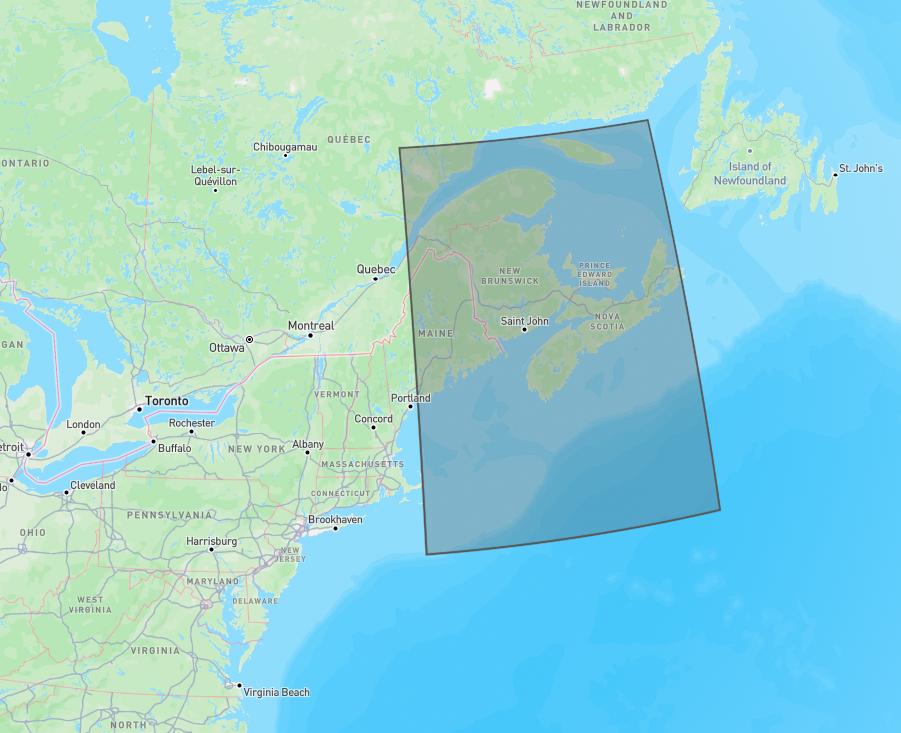

In [6]:
%%time

bbox = (-70, 40, -60, 50)

ds_bbox_subset = ds.xsg.grid.subset_bbox(ds, bbox)
ds_bbox_subset

CPU times: user 14.3 s, sys: 4.79 s, total: 19.1 s
Wall time: 1min 5s


<xarray.Dataset> Size: 23MB
Dimensions:           (time: 4, node: 356230, nele: 686355, nvertex: 3,
                       mesh: 1, nbou: 262, nvel: 12421)
Coordinates:
  * time              (time) datetime64[ns] 32B 2024-06-19 ... 2024-06-26T12:...
    x                 (node) float64 3MB dask.array<chunksize=(79,), meta=np.ndarray>
    y                 (node) float64 3MB dask.array<chunksize=(79,), meta=np.ndarray>
Dimensions without coordinates: node, nele, nvertex, mesh, nbou, nvel
Data variables:
    element           (nele, nvertex) int32 8MB dask.array<chunksize=(44090, 1), meta=np.ndarray>
    adcirc_mesh       (mesh) int32 4B dask.array<chunksize=(1,), meta=np.ndarray>
    nvell             (nbou) int32 1kB dask.array<chunksize=(262,), meta=np.ndarray>
    max_nvell         int32 4B ...
    ibtype            (nbou) int32 1kB dask.array<chunksize=(262,), meta=np.ndarray>
    nbvv              (nvel) int32 50kB dask.array<chunksize=(12421,), meta=np.ndarray>
    depth             (node) float64 3MB dask.array<chunksize=(79,), meta=np.ndarray>
    wind_max          (node) float64 3MB dask.array<chunksize=(79,), meta=np.ndarray>
    time_of_wind_max  (node) float64 3MB dask.array<chunksize=(79,), meta=np.ndarray>
Attributes: (12/49)
    _FillValue:         -99999.0
    model:              ADCIRC
    version:            56.dev
    grid_type:          Triangular
    description:        2024061900 :-6 hr nowcast and +180 hr forecast ! 32 C...
    agrid:              OceanMesh2D
    ...                 ...
    sfea0:              45.0
    cf:                 0.001
    eslm:               -0.2
    cori:               0.0
    ntif:               8
    nbfr:               0